#### 9.2 SVM's
Used for classification of linear and nonlinear data. Other classification methods attempt to find a decision boundary that minimises the error. SVM's try find a decision boundary that maximises the margin between the two classes called a maximum hyperplane.

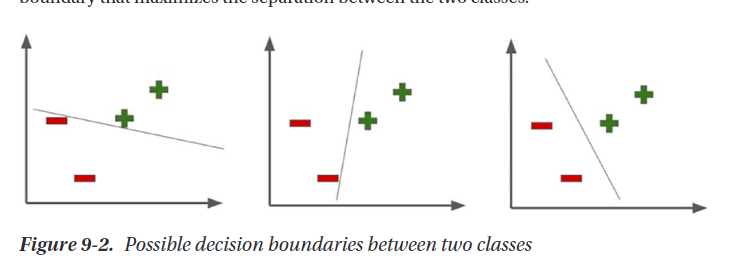

The margin around the decision boundary depends on the points that generate the maximum width of the margin and thus the difference between the closes training points. These points are called support vectors. The other points in the dataset don't contribute to the model. While learning, the goal is to maximise the width of the margin and minimise the margin errors, that is, the points that are on the wrong side of the margin. This reduces to some quadratic optimisation problem.

##### Nonlinear Classification
Import to understand how SVM can be customised to find decision boundaries in nonlinearly seperable data. Assume we have nonlinearly seperable data in one dimension. Hyperplane in this case is a point. Due to the nature of the spread of the data, it is not possible to find a single such point. Using a simple transformation, we add one more dimension to the data - as shown in the image, it  is now possible to find a hyperplane that can easily seperate the two classes.

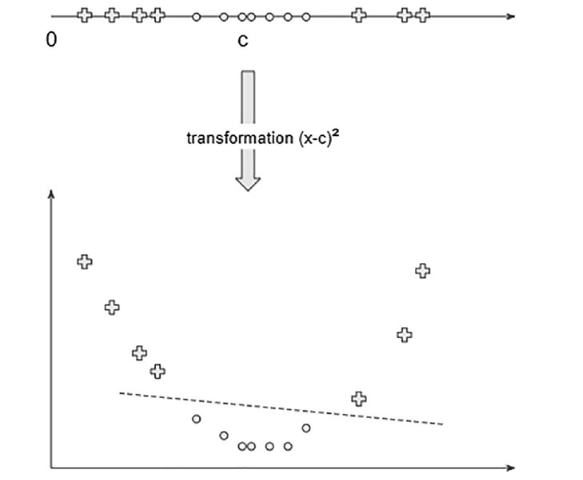

Idea is to first transform the data to a higher dimension using a nonlinear transformation. Then we can find a hyperplane in the new dimensions that can easily seperate the two classes. Inefficient to apply plenty of such transformations following by dot products - hence we use a method called the Kernel Trick.

##### Kernel Trick in SVM


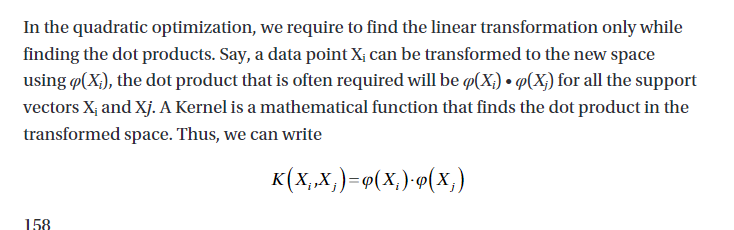

Various kernels: 
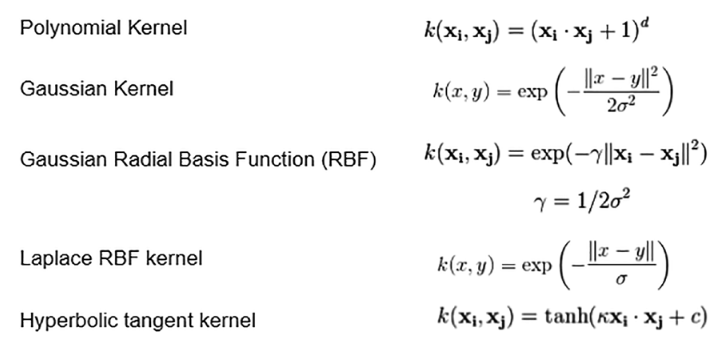

We can experiment with different kernels through the hyperparameters, which are tuned in the experimental process.

In [8]:
#SVM in Python

#sklearn.svm is one package. Also we have sklearn.svm.LinearSVC gives a different
#set of penalties and loss functions compared to sklearn.svm.SVC. 
#For large datasets, LinearSVC has been recommended instead of SVC.
#Choosing the right kernel requires experimentation through cross-validation based model selection.

#Example with iris dataset

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import svm

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df['target'] = iris.target
X = df.iloc[:,:2]
y = df.iloc[:,5]

svc = svm.SVC(kernel='linear', C=15).fit(X,y)

#SVC can accept these kernesl: linear, poly, rbf, sigmoid and precomputed. Default value is rbf.
#May need to add additional hypeparameters depending on kernel - poly kernel needs degree hyperparam.
#Once model is trained - look at support vectors.

support_vector_indices = svc.support_
print(len(support_vector_indices))
support_vectors_per_class = svc.n_support_
print(support_vectors_per_class)

#These give the count of support vectors for each class - only two support vectors for the first class, iris setosa.

support_vectors = svc.support_vectors_
X.iloc[:,1].min()

72
[ 2 36 34]


2.0

c:\Users\adam\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


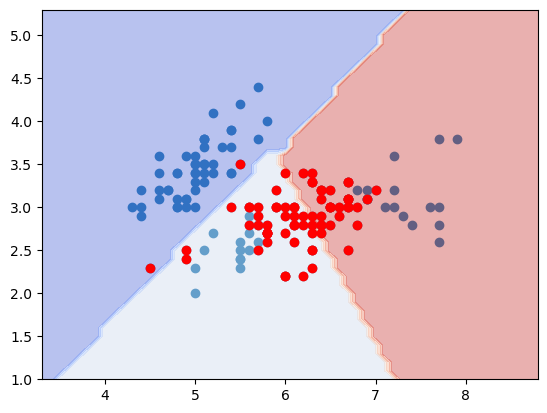

In [16]:
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.arange(X.iloc[:,0].min()-1, X.iloc[:,0].max()+1, 0.1), np.arange(X.iloc[:,1].min()-1, X.iloc[:,1].max()+1, 0.1))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z=Z.reshape(xx.shape)
plt.scatter(X.iloc[:,0], X.iloc[:,1], marker='o')
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.show()
